In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
#df = pd.read_csv("https://raw.githubusercontent.com/EnggQasim/UIT/master/Deep_Learning/Chapter1/data/weight-height.csv")
df = pd.read_csv("./data/weight-height.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [33]:
X = df.Height.values
y_true = df.Weight.values

print(X[:2],
     y_true[:2], sep="\n\n")

[73.84701702 68.78190405]

[241.89356318 162.31047252]


# wX+b
- X provide by user (input)
- W, b try to find these weights through machine learning algoritham


In [34]:
#Line Equation
def line(x, w=0, b=0):
    return x * w + b

# Cost Function
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean())

#1) real-predic
#2) power
#3) Average
#4) sqrt


Text(0, 0.5, 'Loss')

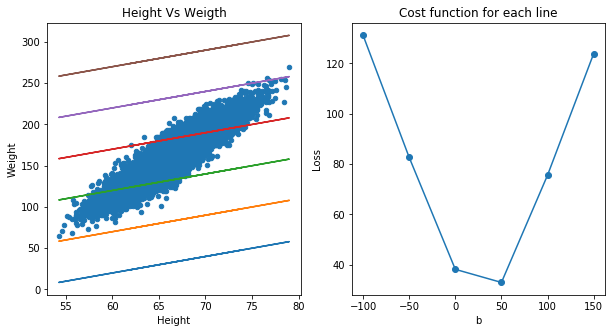

In [35]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)#row, column, select cell
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       ax=ax1,
       title="Height Vs Weigth")

bs = np.array([-100,-50, 0, 50,100, 150])

mses = []# we will store loss value for each line
for b in bs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred)
    mses.append(mse) # each line error/loss
    plt.plot(X, y_pred)

ax2 = plt.subplot(122) 
plt.plot(bs,mses, 'o-')
plt.title("Cost function for each line")
plt.xlabel("b")
plt.ylabel("Loss")

In [38]:
print(y_true)
print(y_pred)

[241.89356318 162.31047252 212.74085556 ... 128.47531878 163.85246135
 113.64910268]
[297.69403404 287.56380809 298.22021078 ... 277.73598443 288.06848626
 273.88849176]


# Try to find w and b (weights) with Deep learning

In [11]:
from tensorflow.keras.models import Sequential # Sequential/Functional Api
from tensorflow.keras.layers import Dense # type of layer
from tensorflow.keras.optimizers import Adam, SGD

In [12]:
X = df.Height.values
y_true = df.Weight.values

print(X[:2],
     y_true[:2], sep="\n\n")

[73.84701702 68.78190405]

[241.89356318 162.31047252]


In [13]:
X.shape

(10000,)

In [15]:
#Model Structure
model = Sequential()
model.add(Dense(1, input_shape=(1,)))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [17]:
#compilation steps
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [19]:
#Model Training
model.fit(X, y_true, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 2ms/step - loss: 1328.2812
Epoch 2/40
313/313 [==============================] - 1s 2ms/step - loss: 573.9647
Epoch 3/40
313/313 [==============================] - 1s 2ms/step - loss: 529.2777
Epoch 4/40
313/313 [==============================] - 1s 2ms/step - loss: 492.3606
Epoch 5/40
313/313 [==============================] - 1s 2ms/step - loss: 469.2266
Epoch 6/40
313/313 [==============================] - 1s 2ms/step - loss: 414.6873
Epoch 7/40
313/313 [==============================] - 1s 2ms/step - loss: 371.8924
Epoch 8/40
313/313 [==============================] - 1s 2ms/step - loss: 341.1653
Epoch 9/40
313/313 [==============================] - 1s 2ms/step - loss: 324.1262
Epoch 10/40
313/313 [==============================] - 1s 2ms/step - loss: 293.4867
Epoch 11/40
313/313 [==============================] - 1s 2ms/step - loss: 266.8832
Epoch 12/40
313/313 [==============================] - 1s 2ms/step - loss: 252.3976


In [20]:
y_pred = model.predict(X)
y_pred

array([[226.51132],
       [187.1207 ],
       [228.55734],
       ...,
       [148.90588],
       [189.08304],
       [133.94519]], dtype=float32)

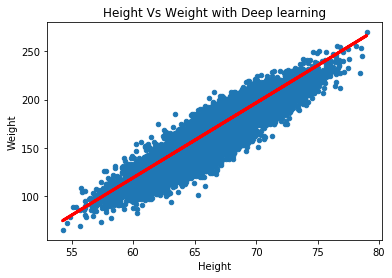

In [21]:
df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight with Deep learning")
plt.plot(X, y_pred, color="red", linewidth=3)

In [23]:
w, b = model.get_weights()
print(w,b)

[[7.776857]] [-347.78635]


In [24]:
model.predict([[120]])

array([[585.4365]], dtype=float32)

Enter Height in Number80


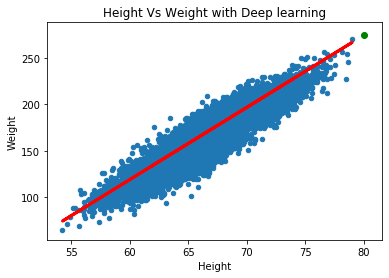

In [29]:
i = int(input("Enter Height in Number"))
j = model.predict([[i]])

df.plot(kind='scatter',
       x="Height",
       y="Weight",
       title="Height Vs Weight with Deep learning")
plt.plot(X, y_pred, color="red", linewidth=3)
plt.scatter(i,j, color='green')

In [ ]:
#colab.com
#import tensorflow
#tensorflow.__version__
#pip install --upgrade tensorflow
#tensorflow.__version__

In [30]:
model.save("./weight_height_model.h5")